<a href="https://colab.research.google.com/github/samer-glitch/Leveraging-Machine-Learning-for-Identifying-and-Classifying-Cyber-Threats-in-Network-Environments/blob/main/General%20Anomaly%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **General Anomaly Detection**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv to Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv


<ipython-input-25-b3646e484e34>:9: DtypeWarning: Columns (0,2,4,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv')


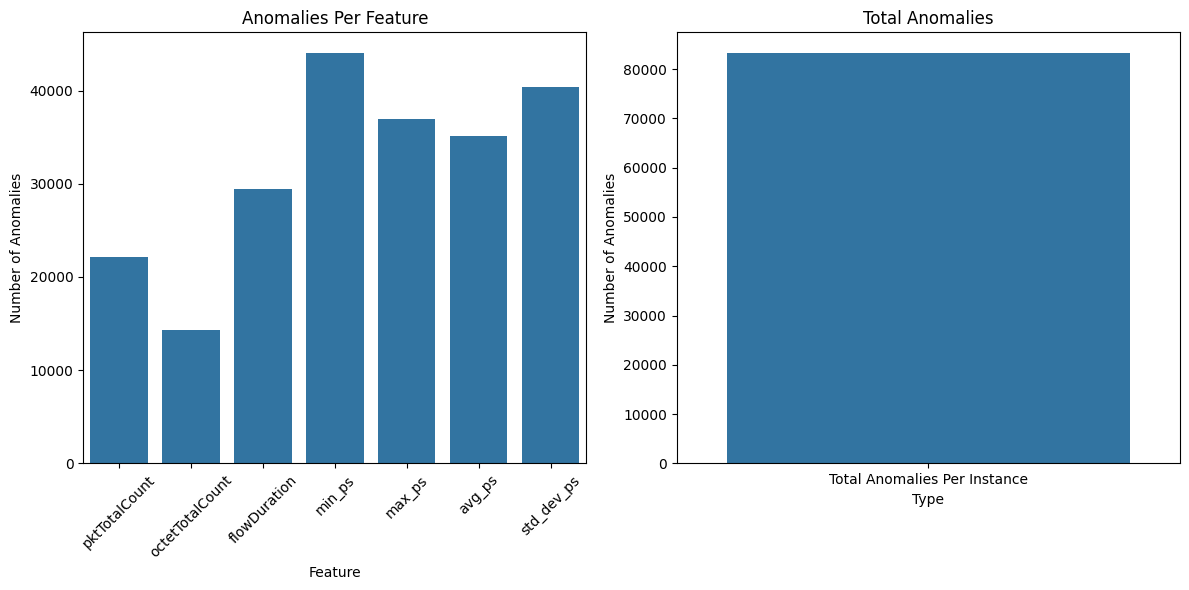

83296

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv')

# Select key features
key_features = ['pktTotalCount', 'octetTotalCount', 'flowDuration', 'min_ps', 'max_ps', 'avg_ps', 'std_dev_ps']
data = df[key_features]

# Handling NaN values by filling them with the median
data_filled = data.fillna(data.median())

# Initialize StandardScaler
scaler = StandardScaler()

# Standardizing and detecting anomalies for each feature individually
for feature in key_features:
    # Standardizing the feature
    feature_data = data_filled[[feature]].values  # Reshape for single feature
    feature_data_scaled = scaler.fit_transform(feature_data)

    # Training Isolation Forest on the feature
    isolation_forest.fit(feature_data_scaled)

    # Identifying anomalies
    feature_predictions = isolation_forest.predict(feature_data_scaled)
    feature_anomalies[feature] = np.sum(feature_predictions == -1)

# Initialize Isolation Forest
isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Dictionary to store anomaly predictions for each feature
feature_anomalies = {}
feature_predictions_dict = {}

# Detecting anomalies for each feature
for feature in key_features:
    feature_data = data_filled[[feature]].values  # Reshape for single feature
    feature_data_scaled = scaler.fit_transform(feature_data)
    isolation_forest.fit(feature_data_scaled)
    feature_predictions = isolation_forest.predict(feature_data_scaled)
    feature_predictions_dict[feature] = feature_predictions
    feature_anomalies[feature] = np.sum(feature_predictions == -1)

# Aggregating anomaly labels per instance
anomalous_instances = np.zeros(len(data_filled), dtype=bool)
for feature in key_features:
    anomalous_instances = np.logical_or(anomalous_instances, feature_predictions_dict[feature] == -1)

# Counting the total number of anomalous instances
total_anomalous_instances = np.sum(anomalous_instances)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting anomalies per feature
plt.subplot(1, 2, 1)
sns.barplot(x=list(feature_anomalies.keys()), y=list(feature_anomalies.values()))
plt.title('Anomalies Per Feature')
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Number of Anomalies')

# Plotting total anomalies per instance
plt.subplot(1, 2, 2)
sns.barplot(x=["Total Anomalies Per Instance"], y=[total_anomalous_instances])
plt.title('Total Anomalies')
plt.xlabel('Type')
plt.ylabel('Number of Anomalies')

plt.tight_layout()
plt.show()

# Counting the total number of anomalous instances
total_anomalous_instances = np.sum(anomalous_instances)
total_anomalous_instances

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv', low_memory=False)

# Defining the key features for anomaly detection
key_features = ['pktTotalCount', 'octetTotalCount', 'flowDuration', 'min_ps', 'max_ps', 'avg_ps', 'std_dev_ps']

# Handling NaN values in the dataset
data_filled = df[key_features].fillna(df[key_features].median())

# Initializing dictionaries to store anomaly counts for each feature
if_anomaly_counts = {}
kmeans_anomaly_counts = {}

# Dictionary to store overall anomaly flags for each instance by model
if_overall_anomalies = np.zeros(len(df), dtype=bool)
kmeans_overall_anomalies = np.zeros(len(df), dtype=bool)

# Iterate over each feature to apply models
for feature in key_features:
    # Isolating the feature column
    feature_data = data_filled[[feature]].values

    # Normalizing and standardizing the feature data
    scaler = StandardScaler()
    feature_scaled = scaler.fit_transform(feature_data)

    # Isolation Forest
    isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42, n_jobs=-1)
    if_anomalies = isolation_forest.fit_predict(feature_scaled) == -1
    if_anomaly_counts[feature] = np.sum(if_anomalies)
    if_overall_anomalies |= if_anomalies

    # KMeans
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(feature_scaled)
    distances = kmeans.transform(feature_scaled)
    smallest_cluster = np.argmin(kmeans.cluster_centers_.sum(axis=1))
    threshold = np.percentile(distances[:, smallest_cluster], 75)
    kmeans_anomalies = distances[:, smallest_cluster] > threshold
    kmeans_anomaly_counts[feature] = np.sum(kmeans_anomalies)
    kmeans_overall_anomalies |= kmeans_anomalies

# Adding overall anomaly counts
if_anomaly_counts['Overall'] = np.sum(if_overall_anomalies)
kmeans_anomaly_counts['Overall'] = np.sum(kmeans_overall_anomalies)

# Plotting the anomaly counts for Isolation Forest
plt.figure(figsize=(14, 6))
sns.barplot(x=list(if_anomaly_counts.keys()), y=list(if_anomaly_counts.values()))
plt.title("Isolation Forest Anomaly Counts by Feature and Overall")
plt.ylabel("Count of Anomalies")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.show()

# Plotting the anomaly counts for KMeans
plt.figure(figsize=(14, 6))
sns.barplot(x=list(kmeans_anomaly_counts.keys()), y=list(kmeans_anomaly_counts.values()), color='skyblue')
plt.title("KMeans Anomaly Counts by Feature and Overall")
plt.ylabel("Count of Anomalies")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.show()


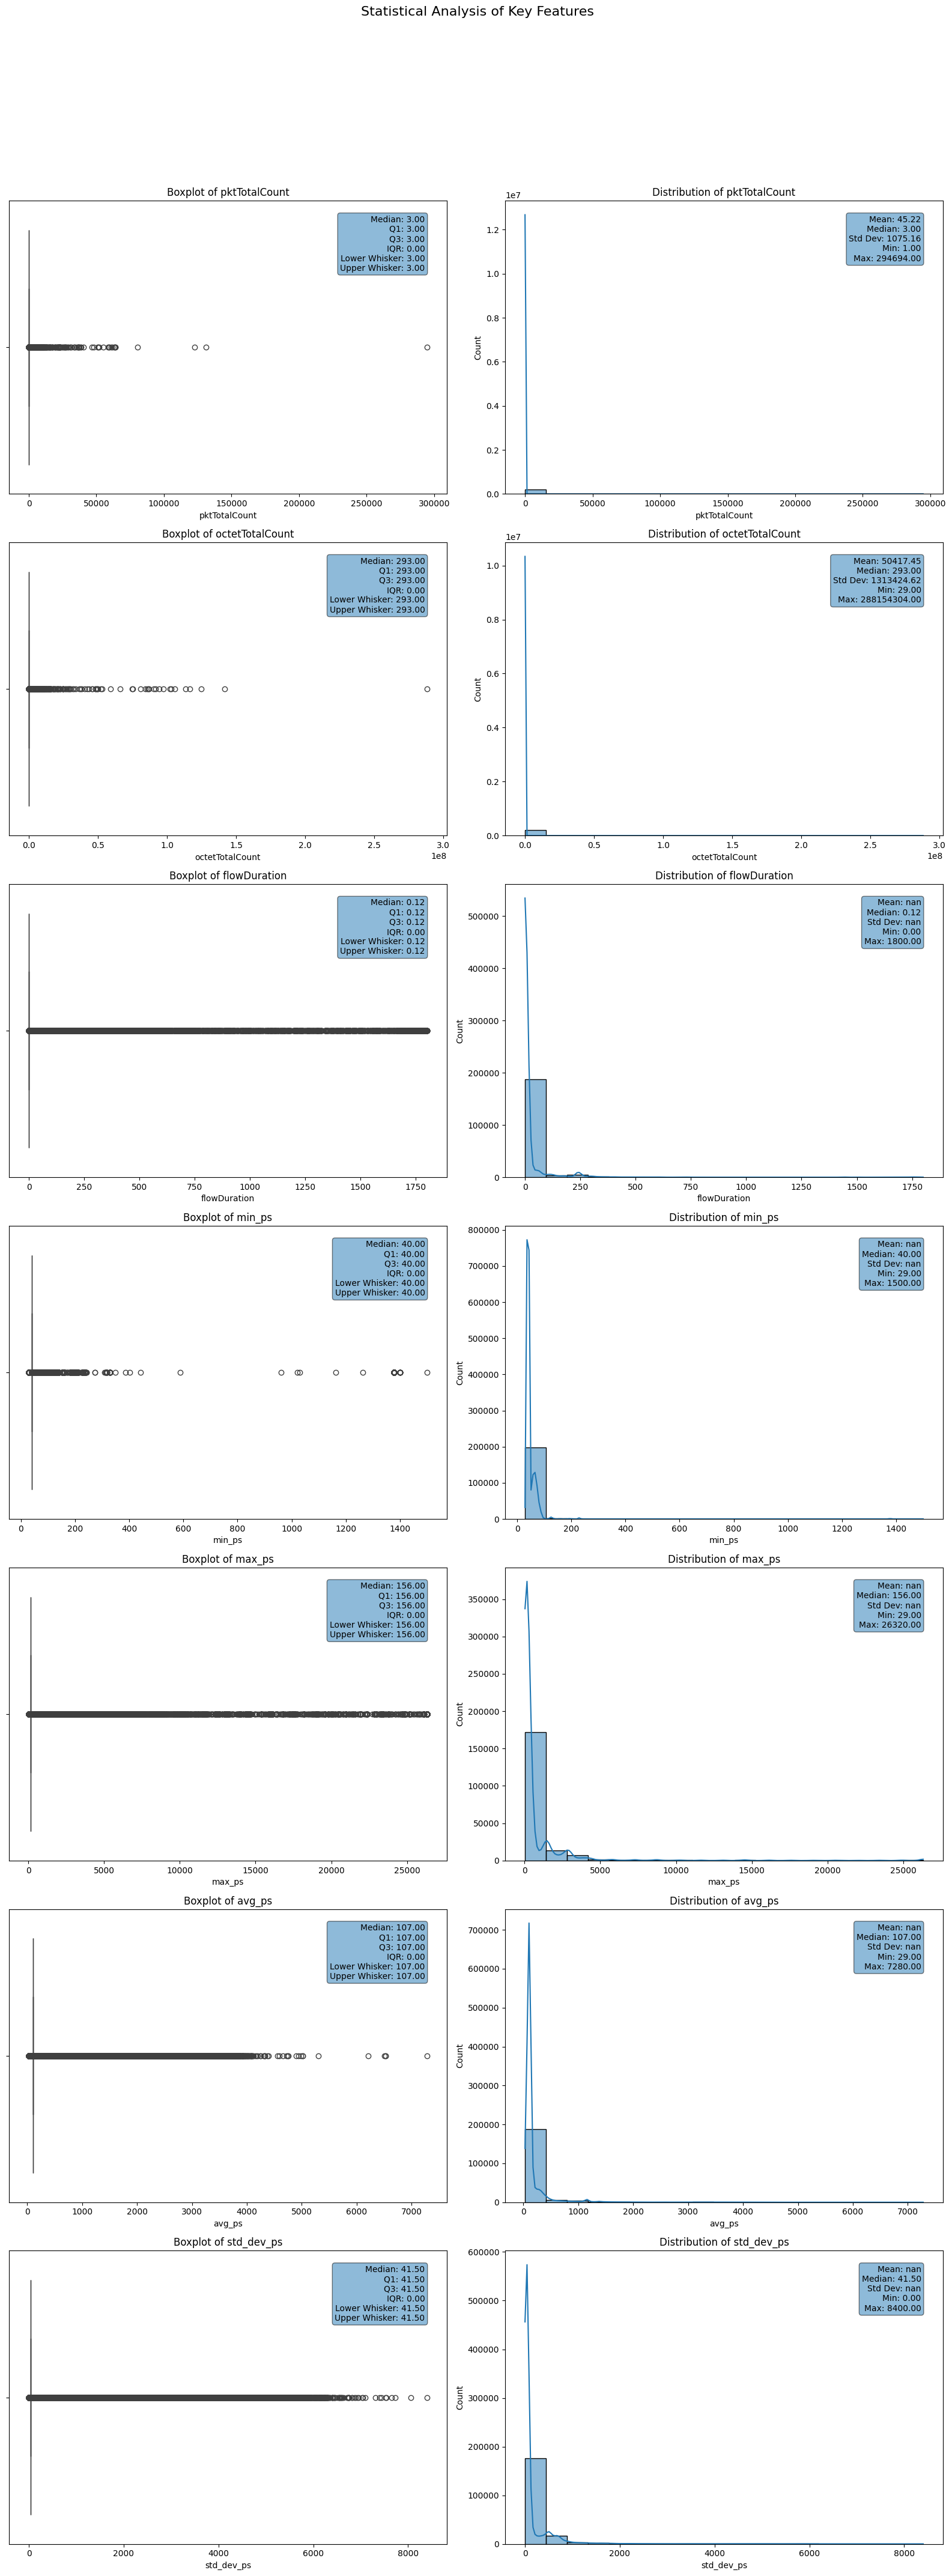

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming reduce_memory_usage function and data loading code remains the same

# Reduce memory usage of the DataFrame
df = reduce_memory_usage(df)

# Select key features
key_features = ['pktTotalCount', 'octetTotalCount', 'flowDuration', 'min_ps', 'max_ps', 'avg_ps', 'std_dev_ps']

# Handling NaN values by filling them with the median
data_filled = df[key_features].fillna(df[key_features].median())

# Number of rows for the subplot matrix (one row per feature)
n_features = len(key_features)

# Create a figure to host all subplots
fig, axes = plt.subplots(nrows=n_features, ncols=2, figsize=(16, n_features * 6))  # Adjusted for better visualization
fig.suptitle('Statistical Analysis of Key Features', fontsize=16, y=1.02)

for i, feature in enumerate(key_features):
    # Boxplot with IQR annotation
    sns.boxplot(x=data_filled[feature], ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of {feature}')
    q1 = data_filled[feature].quantile(0.25)
    q3 = data_filled[feature].quantile(0.75)
    iqr = q3 - q1
    median = data_filled[feature].median()
    upper_whisker = q3 + 1.5 * iqr
    lower_whisker = q1 - 1.5 * iqr
    boxplot_stats = '\n'.join((
        f'Median: {median:.2f}',
        f'Q1: {q1:.2f}',
        f'Q3: {q3:.2f}',
        f'IQR: {iqr:.2f}',
        f'Lower Whisker: {lower_whisker:.2f}',
        f'Upper Whisker: {upper_whisker:.2f}'))
    axes[i, 0].text(0.95, 0.95, boxplot_stats, transform=axes[i, 0].transAxes, verticalalignment='top', horizontalalignment='right', fontsize=10, bbox=dict(boxstyle="round", alpha=0.5))

    # Distribution plot with KDE and statistical measurements
    sns.histplot(data_filled[feature], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution of {feature}')
    mean = data_filled[feature].mean()
    std_dev = data_filled[feature].std()
    distribution_stats = '\n'.join((
        f'Mean: {mean:.2f}',
        f'Median: {median:.2f}',
        f'Std Dev: {std_dev:.2f}',
        f'Min: {data_filled[feature].min():.2f}',
        f'Max: {data_filled[feature].max():.2f}'))
    axes[i, 1].text(0.95, 0.95, distribution_stats, transform=axes[i, 1].transAxes, verticalalignment='top', horizontalalignment='right', fontsize=10, bbox=dict(boxstyle="round", alpha=0.5))

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


In [22]:
import pandas as pd
import numpy as np

# Reduce memory usage of the DataFrame
df = reduce_memory_usage(df)

# Select key features
key_features = ['pktTotalCount', 'octetTotalCount', 'flowDuration', 'min_ps', 'max_ps', 'avg_ps', 'std_dev_ps']

# Handling NaN values by filling them with the median
data_filled = df[key_features].fillna(df[key_features].median())

# Initializing an empty list to store each feature's statistics DataFrame
stats_list = []

for feature in key_features:
    # Calculating boxplot stats
    q1 = data_filled[feature].quantile(0.25)
    q3 = data_filled[feature].quantile(0.75)
    iqr = q3 - q1
    median = data_filled[feature].median()
    upper_whisker = data_filled[feature][data_filled[feature] <= q3 + 1.5 * iqr].max()
    lower_whisker = data_filled[feature][data_filled[feature] >= q1 - 1.5 * iqr].min()

    # Calculating distribution stats
    mean = data_filled[feature].mean()
    std_dev = data_filled[feature].std()
    min_val = data_filled[feature].min()
    max_val = data_filled[feature].max()

    # Creating a DataFrame for current feature's stats
    feature_stats = pd.DataFrame({
        "Feature": [feature],
        "Mean": [mean],
        "Median": [median],
        "Std Dev": [std_dev],
        "Min": [min_val],
        "Max": [max_val],
        "Q1": [q1],
        "Q3": [q3],
        "IQR": [iqr],
        "Lower Whisker": [lower_whisker],
        "Upper Whisker": [upper_whisker]
    })

    # Appending the DataFrame to the list
    stats_list.append(feature_stats)

# Concatenating all feature stats DataFrames into a single DataFrame
stats_df = pd.concat(stats_list, ignore_index=True)

# Display the stats DataFrame
from IPython.display import display, HTML

# Display the stats DataFrame as HTML
display(HTML(stats_df.to_html(index=False)))


Feature,Mean,Median,Std Dev,Min,Max,Q1,Q3,IQR,Lower Whisker,Upper Whisker
pktTotalCount,45.223316,3.000000,1.075165e+03,1.0,294694.0,3.000000,3.000000,0.0,3.000000,3.000000
octetTotalCount,50417.449219,293.000000,1.313425e+06,29.0,288154304.0,293.000000,293.000000,0.0,293.000000,293.000000
flowDuration,NaN,0.124329,NaN,0.0,1800.0,0.124329,0.124329,0.0,0.124329,0.124329
min_ps,NaN,40.000000,NaN,29.0,1500.0,40.000000,40.000000,0.0,40.000000,40.000000
max_ps,NaN,156.000000,NaN,29.0,26320.0,156.000000,156.000000,0.0,156.000000,156.000000
avg_ps,NaN,107.000000,NaN,29.0,7280.0,107.000000,107.000000,0.0,107.000000,107.000000
std_dev_ps,NaN,41.500000,NaN,0.0,8400.0,41.500000,41.500000,0.0,41.500000,41.500000


Feature: pktTotalCount, Anomalies detected: 10252, Percentage of anomalies: 5.13%
Feature: octetTotalCount, Anomalies detected: 10694, Percentage of anomalies: 5.35%
Feature: flowDuration, Anomalies detected: 20096, Percentage of anomalies: 10.05%
Feature: min_ps, Anomalies detected: 1769, Percentage of anomalies: 0.88%
Feature: max_ps, Anomalies detected: 8519, Percentage of anomalies: 4.26%
Feature: avg_ps, Anomalies detected: 10314, Percentage of anomalies: 5.16%
Feature: std_dev_ps, Anomalies detected: 6307, Percentage of anomalies: 3.15%


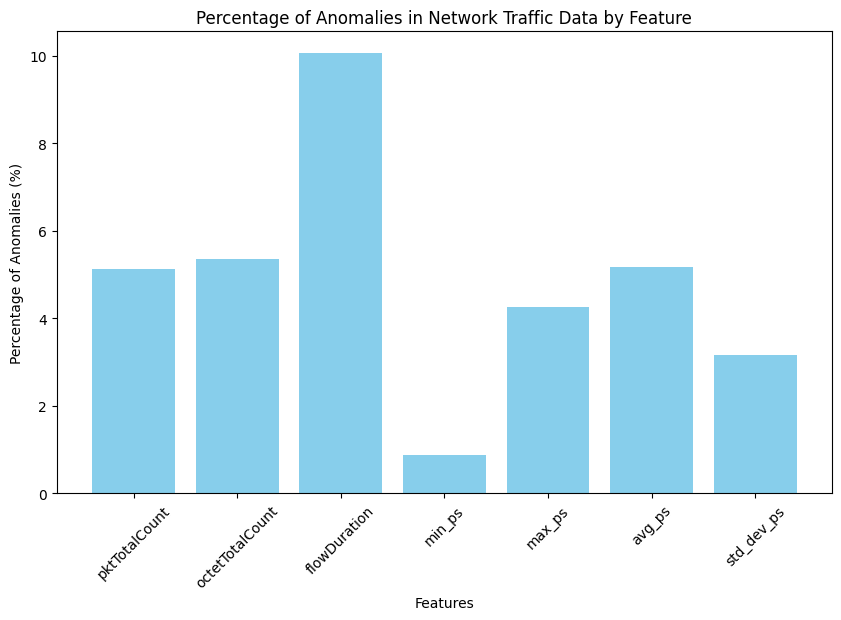

In [27]:
# The anomalies detected in your dataset represent data points that fall outside the typical range defined by the Interquartile Range (IQR) method.
# Specifically, these anomalies are values that are either below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where Q1 and Q3 are the first and third quartiles, respectively.
# This method is commonly used in statistical analysis to identify outliers that might be due to variability in the measurement or may indicate experimental errors.
# In the context of network traffic data, anomalies could represent unusual traffic patterns, potential security threats like DDoS attacks, or data collection errors.

import pandas as pd
import numpy as np

# Assuming df is your DataFrame after applying reduce_memory_usage and filling NaN values

# Select key features
key_features = ['pktTotalCount', 'octetTotalCount', 'flowDuration', 'min_ps', 'max_ps', 'avg_ps', 'std_dev_ps']

# Total number of instances in the dataset
total_instances = len(df)  # Assuming df has 100,000 instances

anomalies_counts = {}
anomalies_percentages = {}

for feature in key_features:
    # Calculating boxplot stats
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identifying anomalies
    anomalies = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    # Counting anomalies and calculating their percentage
    anomalies_count = len(anomalies)
    anomalies_percentage = (anomalies_count / total_instances) * 100

    anomalies_counts[feature] = anomalies_count
    anomalies_percentages[feature] = anomalies_percentage

# Print out the anomalies count and their percentage for each feature
for feature in key_features:
    print(f"Feature: {feature}, Anomalies detected: {anomalies_counts[feature]}, Percentage of anomalies: {anomalies_percentages[feature]:.2f}%")
import matplotlib.pyplot as plt

# Features and their corresponding anomalies percentages
features = ['pktTotalCount', 'octetTotalCount', 'flowDuration', 'min_ps', 'max_ps', 'avg_ps', 'std_dev_ps']
anomalies_percentages = [5.13, 5.35, 10.05, 0.88, 4.26, 5.16, 3.15]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(features, anomalies_percentages, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Percentage of Anomalies (%)')
plt.title('Percentage of Anomalies in Network Traffic Data by Feature')
plt.xticks(rotation=45)  # Rotate feature names for better readability
plt.show()

# High Anomaly Rates (e.g., flowDuration): Features with relatively high percentages of anomalies might indicate features that are more prone to unusual behavior or measurement errors.
# In network traffic data,
# a high anomaly rate in flowDuration could suggest periods of network congestion or attacks that cause delays in packet transmission.
# Low Anomaly Rates (e.g., min_ps): Features with lower percentages of anomalies might be more stable or less variable under normal conditions.
# A low anomaly rate in min_ps (minimum packet size) could indicate that packet sizes are generally consistent and follow expected patterns.